# Chapter 1

In [1]:
try:
    import google.colab
    import requests
    url = 'https://raw.githubusercontent.com/dvgodoy/PyTorchStepByStep/master/config.py'
    r = requests.get(url, allow_redirects=True)
    open('config.py', 'wb').write(r.content)    
except ModuleNotFoundError:
    pass

from config import *
config_chapter1()
# This is needed to render the plots in this chapter
from plots.chapter1 import *

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

# A Simple Regression Problem

$$
\Large y = b + w x + \epsilon
$$

## Data Generation

### Synthetic Data Generation

In [3]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

### Cell 1.1

In [4]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Generated Data - Validation'}, xlabel='x', ylabel='y'>],
       dtype=object))

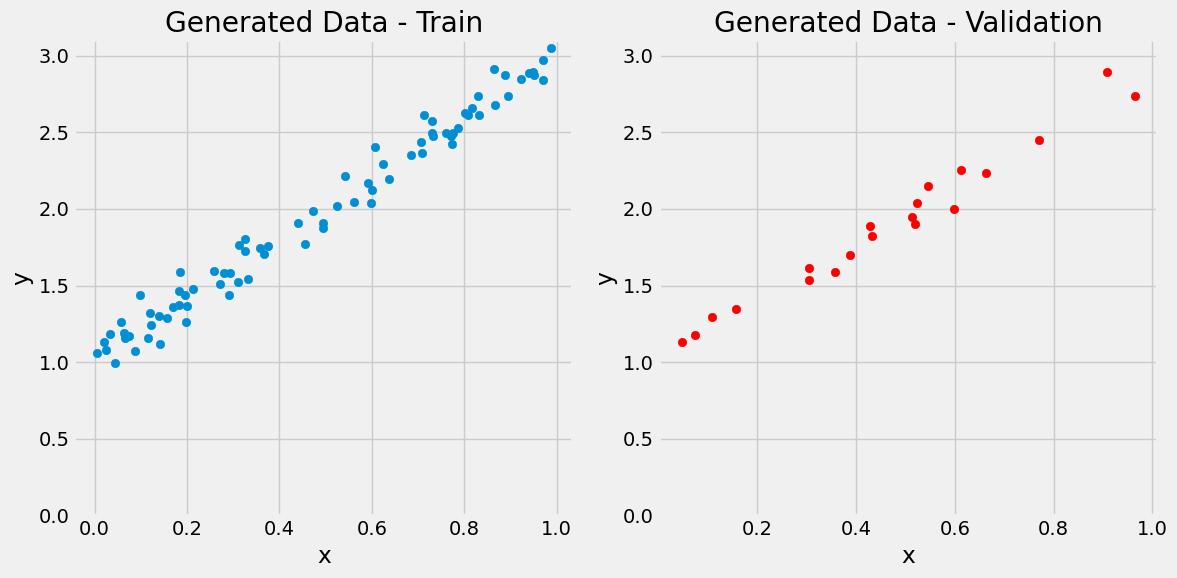

In [5]:
figure1(x_train, y_train, x_val, y_val)

# Gradient Descent

## Step 0: Random Initialization

In [6]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


## Step 1: Compute Model's Predictions

In [7]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train

## Step 2: Compute the Loss

In [8]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

print(loss)

2.7421577700550976


## Step 3: Compute the Gradients

In [9]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


## Step 4: Update the Parameters

In [10]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and 
# the learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


## Step 5: Rinse and Repeat!

In [11]:
# Go back to Step 1 and run observe how your parameters b and w change

# Linear Regression in Numpy

In [12]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

# Sets learning rate
lr = 0.1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - prediction
    y_hat = b + w * x_train
    
    # Step 2 - loss
    error = y_hat - y_train
    loss = (error ** 2).mean()
    
    # Step 3 - gradient
    b_grad = 2 * error.mean()
    w_grad = 2 * (x_train * error).mean()
    
    # Step 4 - update parameters
    b = b - lr * b_grad
    w = w - lr * w_grad
    
print(b, w)

[0.49671415] [-0.1382643]
[1.02354094] [1.96896411]


In [13]:
# Check with scikit-learn
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[1.02354075] [1.96896447]


# PyTorch

In [14]:
scalar = torch.tensor(3.14159)
vector = torch.tensor([1, 2, 3])
matrix = torch.ones((2, 3), dtype=torch.float)
tensor = torch.randn((2, 3, 4), dtype=torch.float)

print(f'Scalar {scalar}')
print(f'Vector {vector}')
print(f'Matrix {matrix}')
print(f'Tensor {tensor}')

Scalar 3.141590118408203
Vector tensor([1, 2, 3])
Matrix tensor([[1., 1., 1.],
        [1., 1., 1.]])
Tensor tensor([[[ 0.8713, -1.2066,  0.2005, -0.3600],
         [-0.3753,  0.5157, -0.4299,  1.0696],
         [-0.0327, -1.6427, -0.4432,  0.7780]],

        [[ 0.3783, -1.3376,  0.4764, -1.7007],
         [-0.2485, -2.0249, -1.4469, -0.0350],
         [-0.3634,  0.7008, -0.7006,  1.4787]]])


In [15]:
tensor.size(), tensor.shape

(torch.Size([2, 3, 4]), torch.Size([2, 3, 4]))

In [16]:
scalar.size(), scalar.shape

(torch.Size([]), torch.Size([]))

In [17]:
# Reshaping using view - SHALLOW COPY
matrix

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [18]:
same_matrix = matrix.view(1, 6)

# change one element
same_matrix[0, 1] = 2

print(matrix)
print(same_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 2., 1., 1., 1., 1.]])


In [19]:
# Reshaping and creating a DEEP COPY
diff_matrix = matrix.new_tensor(matrix.view(1, 6))
diff_matrix[0, 1] = 3

print(matrix) # remains the same
print(diff_matrix) # new version

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 3., 1., 1., 1., 1.]])


/tmp/ipykernel_11403/480552405.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  diff_matrix = matrix.new_tensor(matrix.view(1, 6))


In [20]:
# using the clone method
another_matrix = matrix.view(1, 6).clone().detach()

another_matrix[0, 1] = 4

print(matrix)
print(another_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 4., 1., 1., 1., 1.]])


## Loading Data, Devices, and CUDA

In [21]:
# using as_tensor() preserves the type of the array
x_train_tensor = torch.as_tensor(x_train)
x_train.dtype, x_train_tensor.dtype

(dtype('float64'), torch.float64)

In [22]:
# casting to lower-precision float
float_tensor = x_train_tensor.float()
float_tensor.dtype

torch.float32

In [23]:
# as_tensor() creates a shallow copy
dummy_array = np.array([1, 2, 3])
dummy_tensor = torch.as_tensor(dummy_array)

# modigying dummy array, also modifies the tensor
dummy_array[1] = 0

print(dummy_tensor)

tensor([1, 0, 3])


In [24]:
# make a tensor a numpy array
dummy_tensor.numpy()

array([1, 0, 3])

In [25]:
# defining device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(device)

cuda


In [26]:
n_cudas = torch.cuda.device_count()

for i in range(n_cudas):
    print(torch.cuda.get_device_name(i))

NVIDIA GeForce GTX 1050


In [27]:
# load tensor to GPU
gpu_tensor = torch.as_tensor(x_train).to(device)
gpu_tensor[0]

tensor([0.7713], device='cuda:0', dtype=torch.float64)

In [28]:
# Loading training data to GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Data originally in numpy arrays. Need to transform them into PyTorch tensors
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

In [29]:
print(type(x_train), type(x_train_tensor))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


In [30]:
# the type() method shows what device the tensor is
print(x_train_tensor.type())

torch.cuda.FloatTensor


In [31]:
# but how do we make a gpu tensor back to a numpy array?
# we will get an error
back_to_numpy = x_train_tensor.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [32]:
# we need to make the tensor CPU before converting it back to numpy
back_to_numpy = x_train_tensor.cpu().numpy()

print(type(back_to_numpy))

<class 'numpy.ndarray'>


### Creating parameters

In [33]:
# Tensor parameters requires computation of gradients for being updated
# We can create the tensors in the specified device requiring gradients

# Step 0 - Initalizes parameters "b" and "w' randomly
torch.manual_seed(42)

b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

print(b, w)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)


### Autograd

In [34]:
# Step 1 - Compute predictions - forward pass
yhat = b + w * x_train_tensor

# Step 2 - Computes the loss. All data points. Batch gradient descent
error = (yhat - y_train_tensor)
# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

# Step 3 - Computes the gradients for both "b" and "w' parameters
loss.backward()


In [35]:
# Since b and w requires gradient computation, all tensors in the computation graph will also require gradient calculation implicitly.
# y_hat and error will also require gradiente
# originally, we only set up b and w for gradient computation
print(error.requires_grad, yhat.requires_grad, b.requires_grad, w.requires_grad)
print(y_train_tensor.requires_grad, x_train_tensor.requires_grad)

True True True True
False False


#### grad

In [36]:
# What about the actual value of the gradients? We can get them by accessing the grad attribute of a tensor
print(b.grad, w.grad)

tensor([-3.3881], device='cuda:0') tensor([-1.9439], device='cuda:0')


#### zero_

In [37]:
# everytime we use the gradients to update the parameters, we need to zero the gradients afterward
# the default behavior is to accumulate gradients, then the zero_() methos comes in handy
b.grad.zero_(), w.grad.zero_()

(tensor([0.], device='cuda:0'), tensor([0.], device='cuda:0'))

### Updating parameters

In [38]:
# Set learning rate
lr = 0.1

# Setp 0 - Initializes parameters "b" and "w" randomly\
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Defines number of epochs
EPOCHS = 1000

for epoch in range(EPOCHS):
    # Step 1 - Computes predictions - forward pass
    yhat = b + w * x_train_tensor
    
    # Step 2 - Computes the loss
    # Using all data points. BATCH gradient descent
    error = (yhat - y_train_tensor)
    # Compute MSE (regression problem)
    loss = (error ** 2).mean()
    
    # Step 3 - Computes gradients for both "b" and "w"
    loss.backward()
    
    # Step 4 - Updates parameters using gradients
    with torch.no_grad():
        b -= lr * b.grad
        w -= lr * w.grad
    # zero gradients
    b.grad.zero_()
    w.grad.zero_()
        
print(b, w)
    

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


## Dynamic Computation Graph

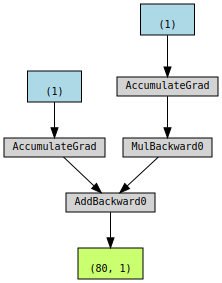

In [39]:
# Step 0 - Initializes parameters "b" and "w"
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Step 1 - compute predictions
yhat = b + w * x_train_tensor
# Step 2 - Computes the Loss
error = (yhat - y_train_tensor)
loss = (error ** 2).mean()
# Plot the Computation Graph
make_dot(yhat)

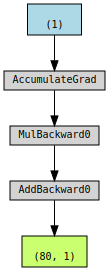

In [40]:
# No gradients for parameter "b"
# Step 0 - Initializes parameters "b" and "w"
b_nograd = torch.randn(1, requires_grad=False, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Step 1 - compute predictions
yhat = b_nograd + w * x_train_tensor
# Step 2 - Computes the Loss
error = (yhat - y_train_tensor)
loss = (error ** 2).mean()
# Plot the Computation Graph
make_dot(yhat)

## Optimizer

#### step / zero_grad

In [41]:
# Sets learning rate
lr = 0.1

# Step 0 - Initializes parameter "b" and "w"
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Defines an SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes predictions
    yhat = b + w * x_train_tensor
    
    # Step 2 - Computes the loss (MSE)
    error = (yhat - y_train_tensor)
    loss = (error ** 2).mean()
    
    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()
    
    # Step 4 - Updates parameters using optimizer
    optimizer.step()
    optimizer.zero_grad()
    
print(b, w)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


## Loss

In [42]:
# Sets learning rate
lr = 0.1

# Step 0 - Initializes parameter "b" and "w"
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Defines an SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

# Defines an MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes predictions
    yhat = b + w * x_train_tensor
    
    # Step 2 - Computes the loss (MSE)
    loss = loss_fn(yhat, y_train_tensor)
    
    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()
    
    # Step 4 - Updates parameters using optimizer
    optimizer.step()
    optimizer.zero_grad()
    
print(b, w)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


In [43]:
loss

tensor(0.0080, device='cuda:0', grad_fn=<MseLossBackward0>)

In [44]:
# if we need to use the value in loss as a numpy array, we need to first detach it as the loss tensor is actually
# computing gradients
loss.detach().cpu().numpy()

array(0.00804466, dtype=float32)

In [45]:
# a much better way is to use item() or tolist()
print(loss.item(), loss.tolist())

0.008044655434787273 0.008044655434787273


In [46]:
type(loss.item())

float

In [47]:
type(loss.tolist())

float

## Model

In [48]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # wrap parameters "b" and "w" with the nn.Parameter clas
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.w = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x):
        # Computes the outputs / predictions
        return self.b + self.w * x

### Parameters

In [49]:
torch.manual_seed(42)
# dummy instance of the model
dummy = ManualLinearRegression()
list(dummy.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

#### state_dict

In [55]:
# we can get the current values of all learnable parameters using state_dict() method
dummy.state_dict()

OrderedDict([('b', tensor([0.3367])), ('w', tensor([0.1288]))])

In [56]:
# the optimizer also has a state_dict()
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.1,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'params': [0, 1]}]}

### Forward Pass

In [59]:
# Sets learning rate
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)

# Now we can crate a model and sent ir at once to the device
model = ManualLinearRegression().to(device)

# Defines an SGD optimizer to update the parameters
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines an MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Defines the number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    model.train()
    
    # Step 1 - Computes predictions
    yhat = model(x_train_tensor)
    
    # Step 2 - Computes loss
    loss = loss_fn(yhat, y_train_tensor)
    
    # Step 3 - Computes gradients
    loss.backward()
    
    # Setp 4 - Updates parameters using gradients and the learning rate
    optimizer.step()
    optimizer.zero_grad()
    
# We can also inspect its parameters using its state_dict
print(model.state_dict())

OrderedDict([('b', tensor([1.0235], device='cuda:0')), ('w', tensor([1.9690], device='cuda:0'))])


### Nested Models

In [60]:
linear = nn.Linear(1, 1)
linear

Linear(in_features=1, out_features=1, bias=True)

In [61]:
linear.state_dict()

OrderedDict([('weight', tensor([[-0.2191]])), ('bias', tensor([0.2018]))])

In [62]:
# building a new model class using the linear model
class MyLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        # now we call the linear model
        self.linear(x)

In [63]:
# check the parameters
torch.manual_seed(42)
dummy = MyLinearRegression().to(device)
list(dummy.parameters())

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

In [64]:
dummy.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear.bias', tensor([0.8300], device='cuda:0'))])

### Sequential Models

In [65]:
torch.manual_seed(42)

model = nn.Sequential(nn.Linear(1, 1)).to(device)

model.state_dict()

OrderedDict([('0.weight', tensor([[0.7645]], device='cuda:0')),
             ('0.bias', tensor([0.8300], device='cuda:0'))])

### Layers

In [66]:
torch.manual_seed(42)
# Building the Neural Network from the book page 112
model = nn.Sequential(
    nn.Linear(3, 5),
    nn.Linear(5, 1)
).to(device)

model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4414,  0.4792, -0.1353],
                      [ 0.5304, -0.1265,  0.1165],
                      [-0.2811,  0.3391,  0.5090],
                      [-0.4236,  0.5018,  0.1081],
                      [ 0.4266,  0.0782,  0.2784]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0815,  0.4451,  0.0853, -0.2695,  0.1472], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2060, -0.0524, -0.1816,  0.2967, -0.3530]], device='cuda:0')),
             ('1.bias', tensor([-0.2062], device='cuda:0'))])

In [68]:
params = model.state_dict()
params['0.weight'].size()

torch.Size([5, 3])

In [69]:
# Notice that the parameters are prefixed with their layer numbers - 0.weight etc
# wE can name the layers by using the add_module
torch.manual_seed(42)
# Rebuilding the previous model using add_module()
model = nn.Sequential()
model.add_module('layer1', nn.Linear(3, 5))
model.add_module('layer2', nn.Linear(5, 1))
model.to(device)

Sequential(
  (layer1): Linear(in_features=3, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [72]:
params = model.state_dict()
params['layer1.weight'].size()

torch.Size([5, 3])

# Putting it All Together

### Data Preparation

In [77]:
%%writefile data_preparation/v0cp.py

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Data originally in numpy arrays. We need to transform them into PyTorch's tensors and send it to the gpu
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

Writing data_preparation/v0cp.py


In [78]:
# Run Data Preparation V0

%run -i data_preparation/v0cp.py

### Model Configuration

In [80]:
%%writefile model_configuration/v0cp.py

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Sets learning rate
lr = 0.1

torch.manual_seed(42)
# Create model and send it to device
model = nn.Sequential(nn.Linear(1, 1)).to(device)

# Defines SGD optimizer to update the parameters
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

Writing model_configuration/v0cp.py


In [81]:
%run -i model_configuration/v0cp.py

### Model Training

In [84]:
%%writefile model_training/v0cp.py

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Sets model to train mode
    model.train()
    
    # Step 1 - Computes model's predicted output - forward pass
    yhat = model(x_train_tensor)
    
    # Step 2 - Computes loss
    loss = loss_fn(yhat, y_train_tensor)
    
    # Step 3 - Computes gradients
    loss.backward()
    
    # Step 4 - Updates parameters
    optimizer.step()
    optimizer.zero_grad()

Writing model_training/v0cp.py


In [86]:
%run -i ./model_training/v0cp.py

In [87]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9690]], device='cuda:0')), ('0.bias', tensor([1.0235], device='cuda:0'))])
